# Air Quality prediction 

## Problem Statement:
- To check the quality of air using ‘Air Quality Chemical Multisensor Device’ by finding the R^2 score and coefficient of regression using different regression models and the best model is selected to evaluate the Air Quality.

### Reference link: 
- imported dataset from: https://archive.ics.uci.edu/ml/machine-learning-databases/00360/

### Dataset Description:

- Date - DD/MM/YY
- Time - HH.MM.SS
- CO(GT) - True hourly averaged concentration CO in mg/m^3
- PT08.S1(CO) - PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
- NMHC(GT) - True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3
- C6H6(GT) - True hourly averaged Benzene concentration in microg/m^3
- PT08.S2(NMHC) - PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
- NOx(GT) - True hourly averaged NOx concentration in ppb
- PT08.S3(NOx) - PT08.S3 (tungsten oxide) hourly averaged sensor response
- NO2(GT) - True hourly averaged NO2 concentration in microg/m^3
- PT08.S4(NO2)- PT08.S4 (tungsten oxide) hourly averaged sensor response
- PT08.S5(O3) - PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
- T - Temperature in Â°C 14.RH - Relative Humidity (%) 15.AH - Absolute Humidity
- RH - Relative Humidity (%)
- AH - Absolute Humidity 

In [1]:
# importing all necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from scipy import stats
import seaborn as sns
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [2]:
# loading the dataset
df = pd.read_excel("AirQualityUCI.xlsx")

df.head(10) #prints the first ten observations from Dataframe


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [3]:
# shape of the Dataframe
df.shape

(9357, 15)

In [4]:
# brief info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [5]:
# checking if there are any null values in data
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [7]:
df.duplicated().sum() #checks if there are any duplicates in the dataframe

0

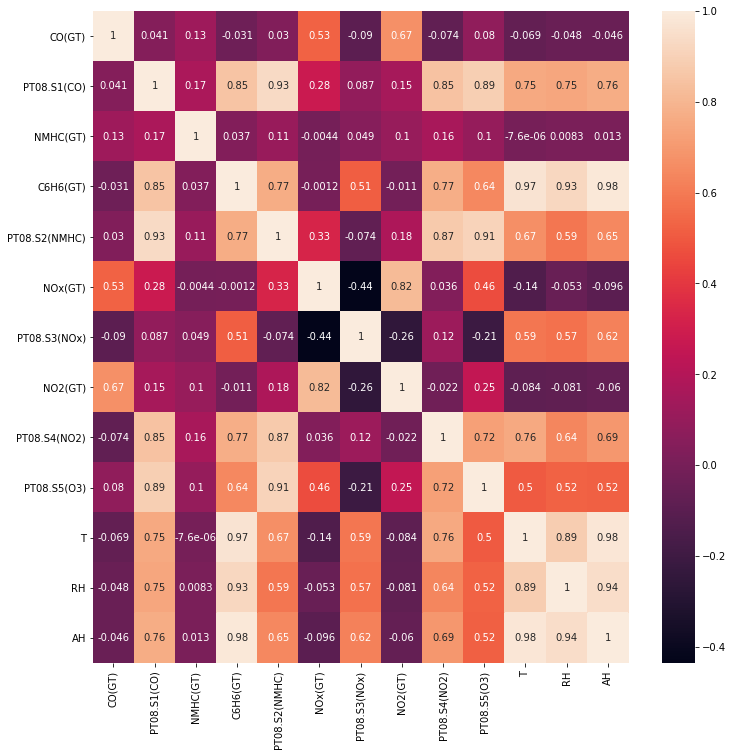

In [8]:
# check the correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [9]:
# dropping unnecessary features
df.drop(['PT08.S4(NO2)', 'Date', 'Time'], axis = 1, inplace=True)

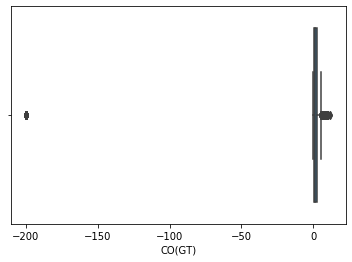

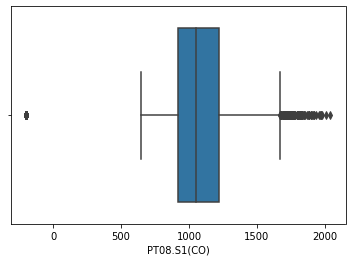

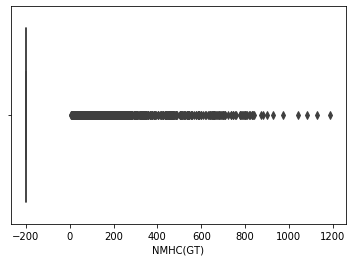

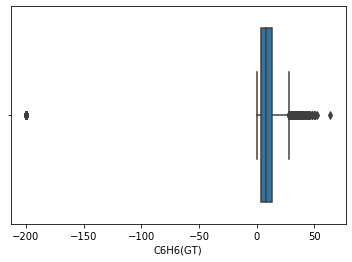

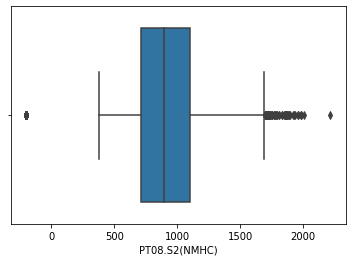

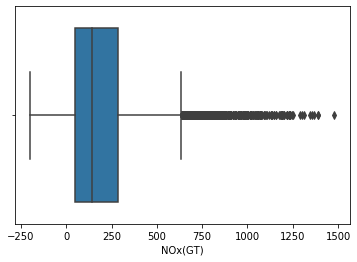

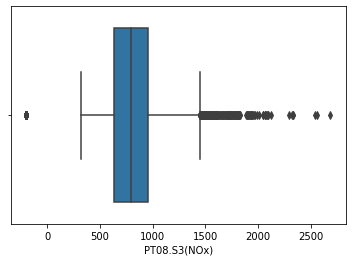

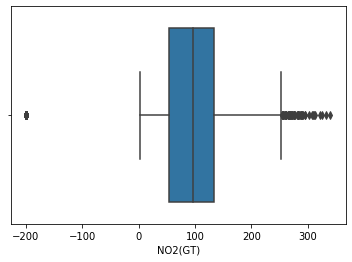

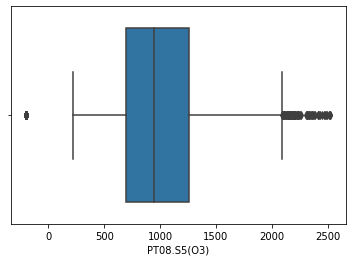

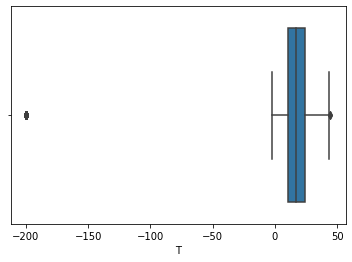

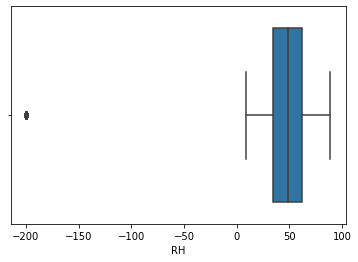

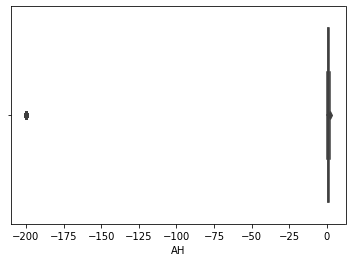

In [10]:
# check for outliers
def boxplot(featrue):
    sns.boxplot(x=featrue, data=df)
    plt.show()
for i in df.columns:
    boxplot(df[i])

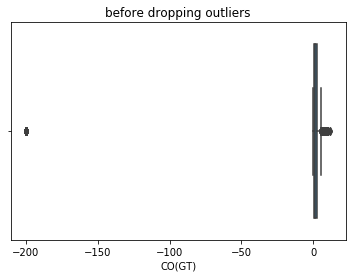

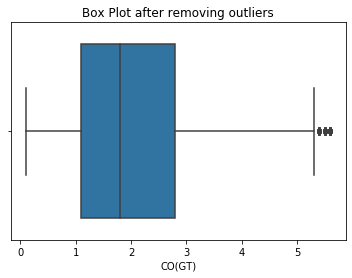

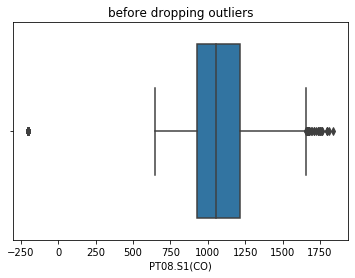

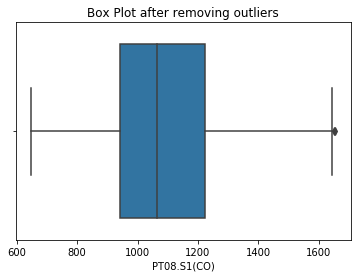

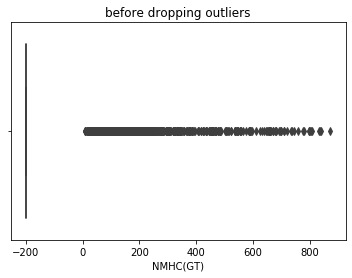

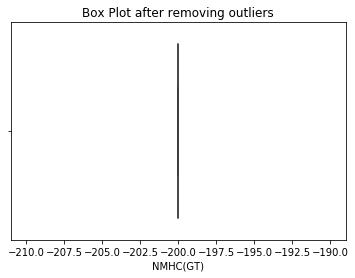

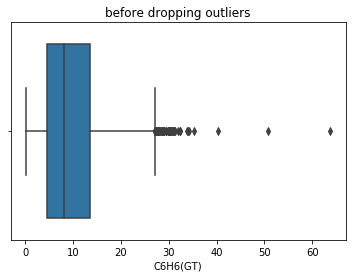

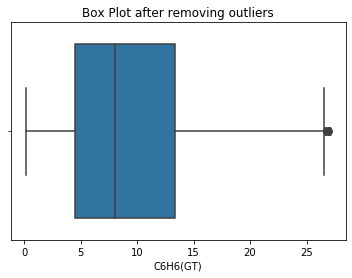

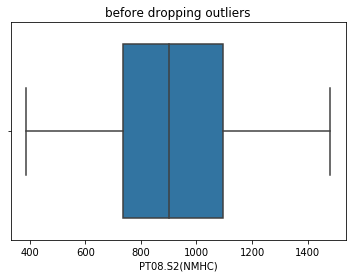

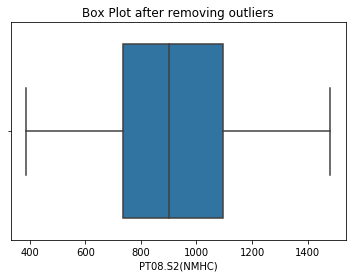

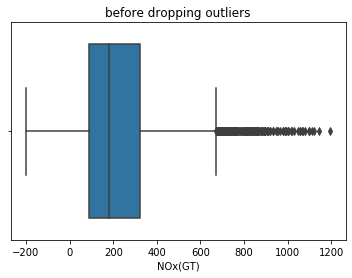

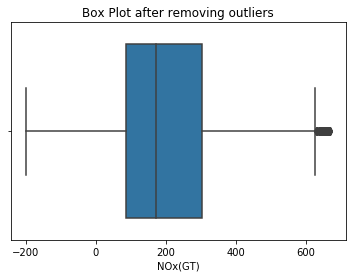

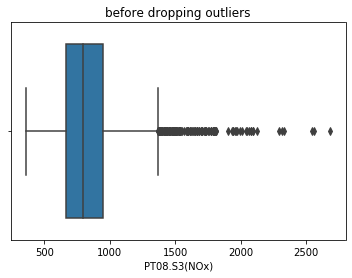

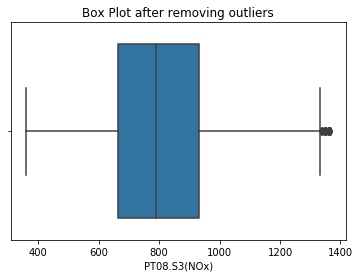

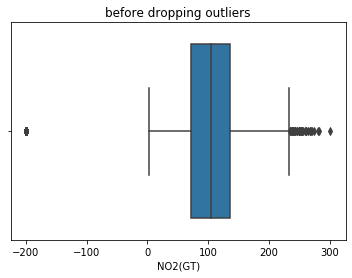

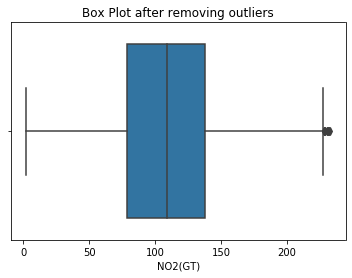

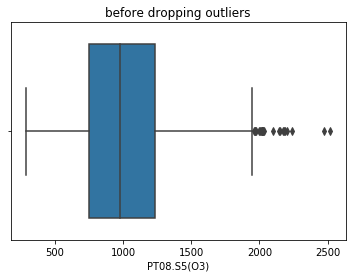

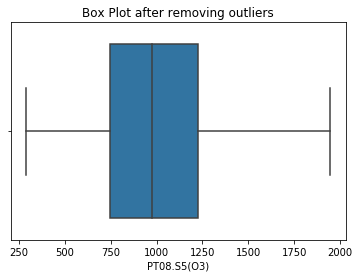

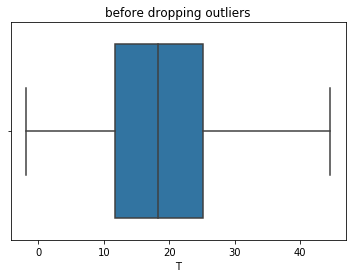

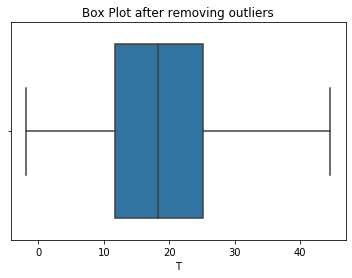

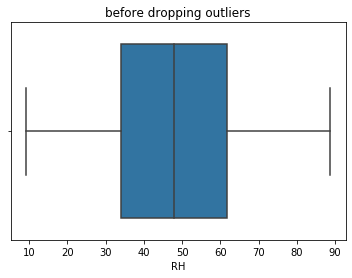

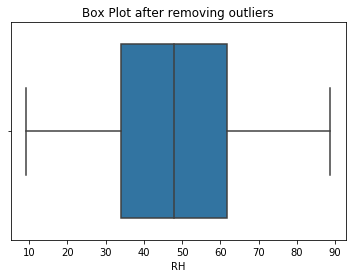

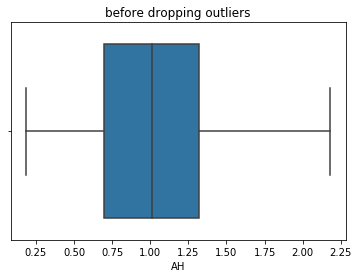

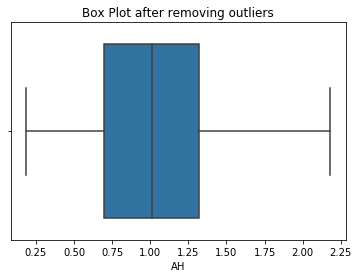

In [11]:
# drop the outliers
def drop_outliers(df, field_name):
    plt.title('before dropping outliers')
    sns.boxplot(x=field_name, data=df)
    plt.show()
    
    
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
    
for i in df.columns:
    
    drop_outliers(df, i)
    
    sns.boxplot(df[i])
    plt.title("Box Plot after removing outliers")
    plt.show()

   

In [12]:
# dividing the input and output variables
x = df.drop(columns='RH', axis=1)
y = df.RH

# splitting the data for trainging and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3)

# printing the shape of the train and test model
print('x_train_shape :',x_train.shape,'x_test_shape :', x_test.shape,'y_train_shape :', y_train.shape,'y_test_shape :', y_test.shape)

x_train_shape : (3804, 11) x_test_shape : (1631, 11) y_train_shape : (3804,) y_test_shape : (1631,)


In [13]:
# importing Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)

pred = linear.predict(x_test)

lr_r2 = r2_score(pred, y_test)
lr_mae = mean_absolute_error(pred, y_test)
lr_mse = mean_squared_error(pred, y_test)

print("Lineaar Regression Model")
print('r2_score : ', lr_r2)
print('Mean Aboslute Error :', lr_mae)
print('Mean Squared Error :', lr_mse)

Lineaar Regression Model
r2_score :  0.8506379376626121
Mean Aboslute Error : 4.912884792175203
Mean Squared Error : 40.52132512504521


In [14]:
# importing Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

pred = dtr.predict(x_test)

print("Decision Tree Model")

dtr_r2 = r2_score(pred, y_test)
dtr_mae = mean_absolute_error(pred, y_test)
dtr_mse = mean_squared_error(pred, y_test)

print('r2_score : ', dtr_r2)
print('Mean Aboslute Error :', dtr_mae)
print('Mean Squared Error :', dtr_mse)

Decision Tree Model
r2_score :  0.992092444731548
Mean Aboslute Error : 1.147731467913977
Mean Squared Error : 2.4978000650465124


In [15]:
# importing Support Vector Machine Model
from sklearn.svm import SVR

svm = SVR()
svm.fit(x_train,y_train)
pred = svm.predict(x_test)

svm_r2 = r2_score(pred, y_test)
svm_mae = mean_absolute_error(pred, y_test)
svm_mse = mean_squared_error(pred, y_test)


print("Support Vector Machine")
print('r2_score : ', svm_r2)
print('Mean Aboslute Error :', svm_mae)
print('Mean Squared Error :', svm_mse)

Support Vector Machine
r2_score :  -3.556363982839306
Mean Aboslute Error : 11.962842659207354
Mean Squared Error : 209.11957508756336


In [16]:
# importing Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

pred = rfr.predict(x_test)

rfr_r2 = r2_score(pred, y_test)
rfr_mae = mean_absolute_error(pred, y_test)
rfr_mse = mean_squared_error(pred, y_test)


print("Random Forest Regressor")
print('r2_score : ', rfr_r2)
print('Mean Aboslute Error :', rfr_mae)
print('Mean Squared Error :', rfr_mse)

Random Forest Regressor
r2_score :  0.998023625535598
Mean Aboslute Error : 0.5001451045201089
Mean Squared Error : 0.6141831516330549


In [17]:
values = {'Models':['Linear Regression', 'Decision Tree','Support Vector Machine', 'Random Forest'],
             'r2_score': [lr_r2, dtr_r2, svm_r2, rfr_r2],
             'MAE': [lr_mae, dtr_mae,svm_mae, rfr_mae],
             'MSE': [lr_mse, dtr_mse, svm_mse, rfr_mse]}
result = pd.DataFrame(values)
result

,Models,r2_score,MAE,MSE
0,Linear Regression,0.850638,4.912885,40.521325
1,Decision Tree,0.992092,1.147731,2.497800
2,Support Vector Machine,-3.556364,11.962843,209.119575
3,Random Forest,0.998024,0.500145,0.614183


# Conclusion:

### The Random Forest and Decision Tree Models have almost the same r2_score. We can choose either of one